# Question D4

*Question*: Which role best describes your current activities within the company?

*Answer Type*: Single Option and Free Field

*Options*: [Project Lead / Project Manager, Business Analyst, Requirements Engineer, Solution Architect, Data Scientist, Developer, Test Manager / Tester, Other, which one?]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

### Basic Analysis

In [3]:
dataframe_obj.df['D4_Role'].head()

0                  Business Analyst
1                  Business Analyst
2    Project Lead / Project Manager
3                Solution Architect
4                    Data Scientist
Name: D4_Role, dtype: object

In [4]:
# mapping of old labels to new one
d4_rename_mapping = {
    'Project Lead / Project Manager': 'Project Lead / Project Manager',
    'Business Analyst': 'Business Analyst',
    'Requirements Engineer': 'Requirements Engineer',
    'Solution Architect': 'Solution Architect',
    'Data Scientist': 'Data Scientist',
    'Developer': 'Developer',
    'Test Manager / Tester': 'Test Manager / Tester',
    'Other, which one?': 'Other'
}

In [5]:
# update values in D4 column
dataframe_obj.df['D4_Role'] = rename_values(rename_mapping=d4_rename_mapping,  
                                            values=list(dataframe_obj.df['D4_Role']))

In [6]:
# cleaning data
dataframe_obj.remove_value_from_df('0','D4_Role')
# dataframe_obj.remove_value_from_df('Other','D4_Role')

In [7]:
dataframe_obj.df['D4_Role'].value_counts().index

Index(['Data Scientist', 'Other', 'Project Lead / Project Manager',
       'Developer', 'Solution Architect', 'Business Analyst',
       'Test Manager / Tester', 'Requirements Engineer'],
      dtype='object')

In [8]:
# barplot data
indexes = list(dataframe_obj.df['D4_Role'].value_counts().index)
values = list(dataframe_obj.df['D4_Role'].value_counts())
chart_positions = [0 if 'Other' in index else 1 for index in indexes]

In [9]:
# plot object
d4_plot = PlotUtils(pd.DataFrame(
    data={'Main Role': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

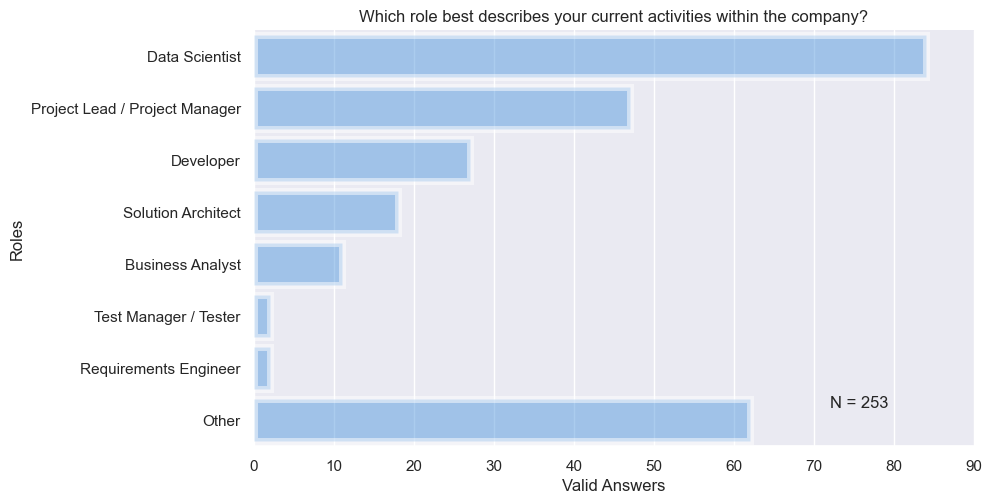

In [10]:
total_answers = 'N = ' + str(len(list(dataframe_obj.df['D4_Role'])))
d4_plot.single_barplot(x_axis="Answers", y_axis="Main Role", 
                       title="Which role best describes your current activities within the company?",
                       x_label="Valid Answers", y_label="Roles", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

### Bootstrapping Analysis

In [11]:
valid_options_list = list(dataframe_obj.df['D4_Role'].unique())
valid_answers_list = list(dataframe_obj.df['D4_Role'])

In [12]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 100, 100, 95)

In [13]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping()

In [16]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Other' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [17]:
# plot object for bootstrapped data
d4_boot_plot = PlotUtils(pd.DataFrame(
    data={'Roles': indexes, 'Value': values,'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

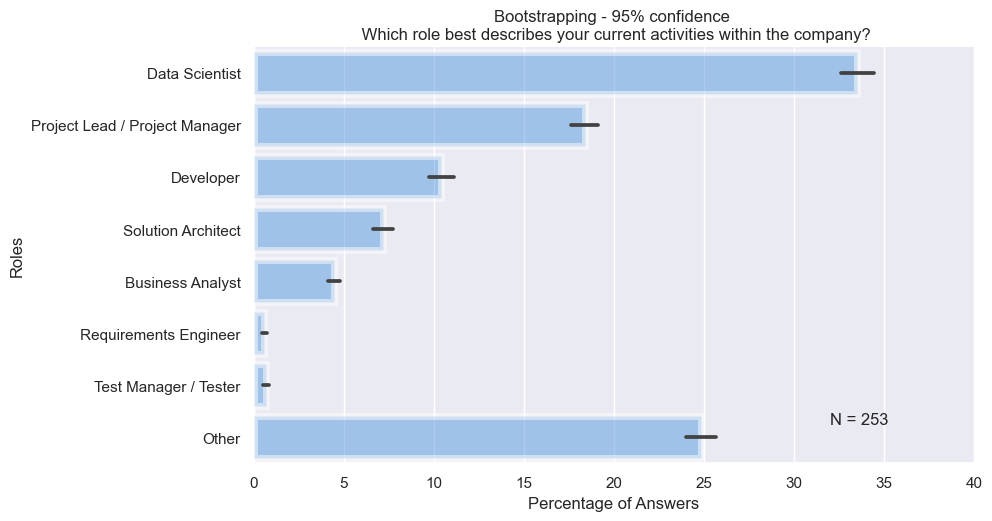

In [18]:
d4_boot_plot.single_barplot(x_axis="Value", y_axis="Roles", 
                       title="Bootstrapping - 95% confidence \n Which role best describes your current activities within the company?",
                       x_label="Percentage of Answers", y_label="Roles", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

In [20]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Business Analyst:(4.102796412404145, 4.46, 4.817203587595855)
Project Lead / Project Manager:(17.62494342185116, 18.38, 19.135056578148838)
Solution Architect:(6.5697087403977505, 7.17, 7.770291259602249)
Data Scientist:(32.59883216448792, 33.49, 34.38116783551208)
Developer:(9.747751986859884, 10.42, 11.092248013140116)
Other:(23.983200060620316, 24.82, 25.656799939379685)
Test Manager / Tester:(0.5258381715482506, 0.68, 0.8341618284517495)
Requirements Engineer:(0.43296819719297386, 0.58, 0.7270318028070261)
